In [22]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
colnames = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'] #Column names
iris = pd.read_csv('iris.data',names = colnames) #Importing data
iris.head(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
iris.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length in cm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width in cm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal length in cm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal width in cm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
print(iris.isnull().sum())

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64


In [119]:
#There are no missing values present in this dataset

In [123]:
if (iris['sepal length in cm'].isnull().sum() > 0) == True :
    iris['sepal length in cm'] = iris['sepal length in cm'].replace(0, iris['sepal length in cm'].median())
else:
    iris['sepal length in cm'] = iris['sepal length in cm']

In [124]:
if (iris['sepal width in cm'].isnull().sum() > 0) == True :
    iris['sepal width in cm'] = iris['sepal width in cm'].replace(0, iris['sepal width in cm'].median())
else:
    iris['sepal width in cm'] = iris['sepal width in cm']

In [125]:
if (iris['petal length in cm'].isnull().sum() > 0) == True :
    iris['petal length in cm'] = iris['petal length in cm'].replace(0, iris['petal length in cm'].median())
else:
    iris['petal length in cm'] = iris['petal length in cm']

In [126]:
if (iris['petal width in cm'].isnull().sum() > 0) == True :
    iris['petal width in cm'] = iris['petal width in cm'].replace(0, iris['petal width in cm'].median())
else:
    iris['petal width in cm'] = iris['petal width in cm']

Since there is no missing value, hence no need missing value treatment but still for safer side we wrote above codes for handling missing values

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.
for feature in iris.columns: # Loop through all columns in the dataframe
    if iris[feature].dtype == 'object': # Only apply for columns with categorical strings
        iris[feature] = pd.Categorical(iris[feature]).codes # Replace strings with an integer

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null int8
dtypes: float64(4), int8(1)
memory usage: 4.9 KB


In [9]:
iris['class'].unique() #class changed to numerical from 0 to 2

array([0, 1, 2], dtype=int64)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [10]:
iris.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


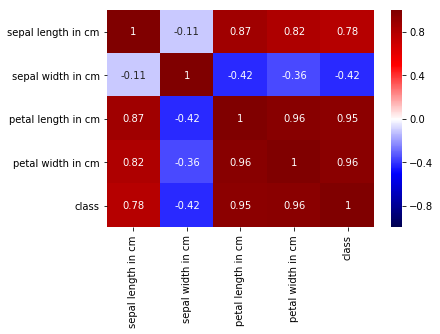

In [13]:
sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [14]:
#As seen from above none of the variables from feature set have correlation in range -0.1 to 0.1 with target variable. 
#Most of the variables are highly correlated with target variable i.e. class

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [15]:
iris.var()

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
class                 0.671141
dtype: float64

In [127]:
# As seen above, there are no variables having no variance or almost zero variance(variance < 0.1). 
#Hence, in this case we are not dropping any of the variables.

## Question 6

*Plot the scatter matrix for all the variables.*

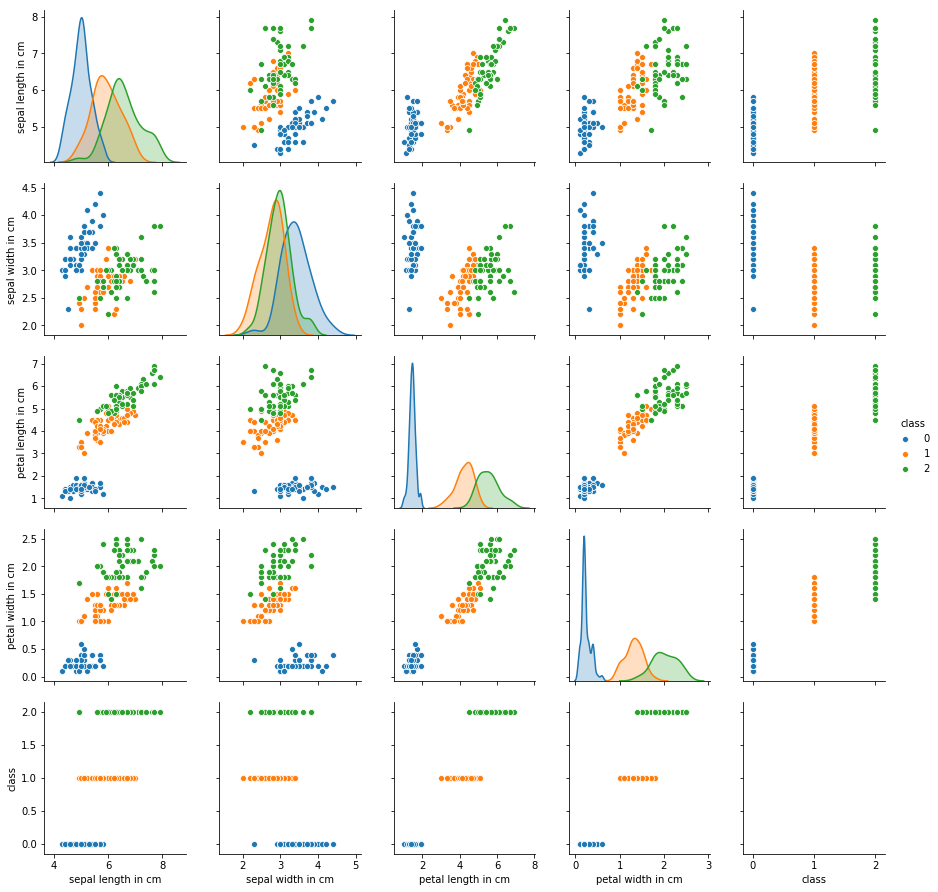

In [16]:
sns.pairplot(iris, hue = "class")

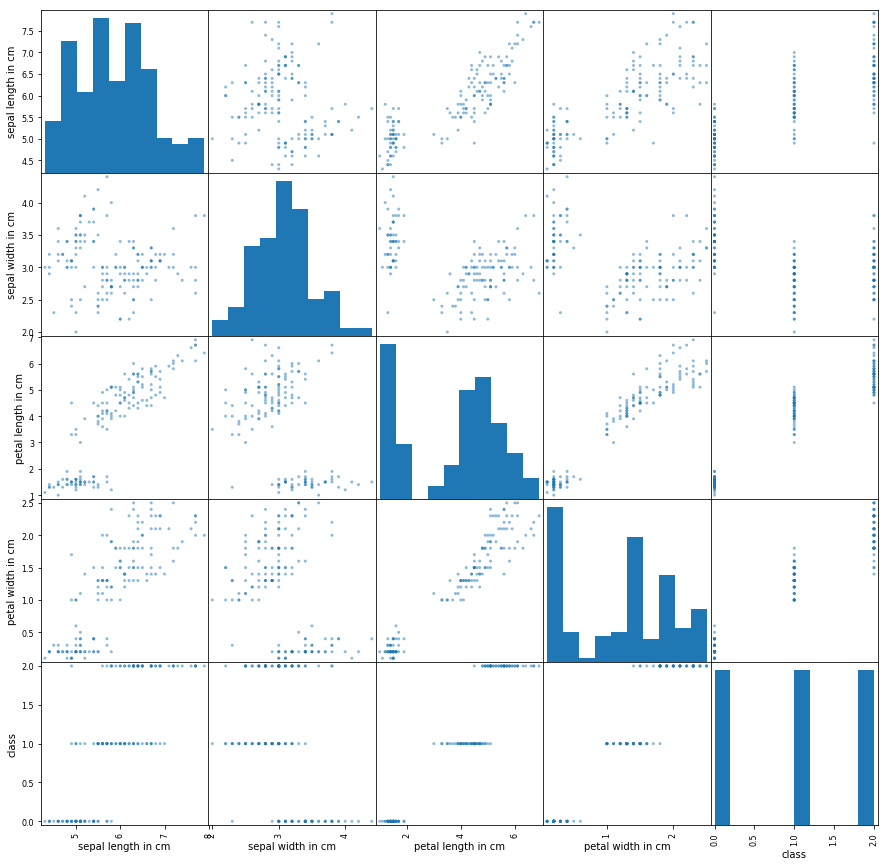

In [132]:
# scatter plot matrix
pd.plotting.scatter_matrix(iris,figsize=(15,15))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [21]:
## Treat “Class” variable as your Dependent Variable and Rest of the columns as Independent Variable and 
##    split the table

df1 = iris.pop('class') 
iris['class'] = df1       
independent_var = iris.iloc[:,:-1]
dependent_var = pd.DataFrame(iris.iloc[:,len(iris.columns)-1])

print(dependent_var.head(), '\n\n\n', independent_var.head())

   class
0      0
1      0
2      0
3      0
4      0 


    sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm  
0                0.2  
1                0.2  
2                0.2  
3                0.2  
4                0.2  


In [23]:
#Spliting the dataset into training and test sets with 80-20 ratio.
X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train      sepal length in cm  sepal width in cm  petal length in cm  \
58                  6.6                2.9                 4.6   
97                  6.2                2.9                 4.3   
129                 7.2                3.0                 5.8   
114                 5.8                2.8                 5.1   
146                 6.3                2.5                 5.0   

     petal width in cm  
58                 1.3  
97                 1.3  
129                1.6  
114                2.4  
146                1.9  , 
 y_train      class
58       1
97       1
129      2
114      2
146      2
--------------------------------------------------------------------------------------------------
X_test      sepal length in cm  sepal width in cm  petal length in cm  \
87                  6.3                2.3                 4.4   
111                 6.4                2.7                 5.3   
10                  5.4                3.7                 1.5  

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [39]:
## Creating the K Nearest Neighbour Classifier Object
## weights options are 'uniform' 'distance'
## weights = 'distance' - weighs points by inverse of their distance
# For K-Value = 3
NNH_3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', 
                           metric = 'euclidean')
## Fit the model
NNH_3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
#Predict the values
y_pred = NNH_3.predict(X_test)

In [42]:
#Accuracy_score calculation
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:3")

Accuracy is  96.66666666666667 % for K-Value:3


In [43]:
#For K-Value=5, Creating the K Nearest Neighbour Classifier Object
NNH_5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                           metric = 'euclidean')
## Fit the model
NNH_5.fit(X_train, y_train)
#Predict the values
y_pred = NNH_5.predict(X_test)
#Accuracy_score calculation
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:5")

Accuracy is  96.66666666666667 % for K-Value:5


In [44]:
#For K-Value=9, Creating the K Nearest Neighbour Classifier Object
NNH_9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', 
                           metric = 'euclidean')
## Fit the model
NNH_9.fit(X_train, y_train)
#Predict the values
y_pred = NNH_9.predict(X_test)
#Accuracy_score calculation
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:9")

Accuracy is  100.0 % for K-Value:9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [135]:
neighbors = np.arange(1, 21, 2)

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    y_m_pred = knn.predict(X_test)
    #scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append({'K_values': k, 'accuracy_score': accuracy_score(y_test, y_m_pred)})
    
#print(cv_scores)

result = pd.DataFrame(cv_scores)
#print(cv_scores['accuracy_score'])
#MCE = 
result['MSE'] = (1 - result['accuracy_score'])
result

,K_values,accuracy_score,MSE
0,1,0.966667,0.033333
1,3,0.966667,0.033333
2,5,0.966667,0.033333
3,7,0.966667,0.033333
4,9,1.000000,0.000000
5,11,1.000000,0.000000
6,13,1.000000,0.000000
7,15,1.000000,0.000000
8,17,0.966667,0.033333
9,19,1.000000,0.000000


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

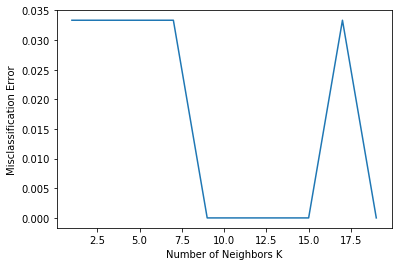

In [137]:
import matplotlib.pyplot as plt

# changing to misclassification error
#MSE = [1 - x for x in cv_scores]

# determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print("The optimal number of neighbors is %d",  optimal_k)

# plot misclassification error vs k
plt.plot(result['K_values'], result['MSE'])
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [97]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# calculate accuracy measures and confusion matrix
from sklearn import metrics

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [66]:
df1 = iris.pop('class') #'class is same as Species column'
iris['class'] = df1       
X = iris.iloc[:,:-1]
y = pd.DataFrame(iris.iloc[:,len(iris.columns)-1])

In [67]:
#Check the dataset
print(y.head(), '\n\n\n', X.head())

   class
0      0
1      0
2      0
3      0
4      0 


    sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm  
0                0.2  
1                0.2  
2                0.2  
3                0.2  
4                0.2  


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

Text(0,0.5,'Class')

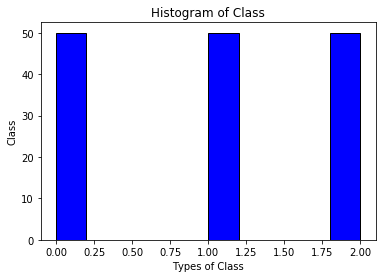

In [79]:
# matplotlib histogram
plt.hist(iris['class'], color = 'blue', edgecolor = 'black',
         bins = 10)
# Add labels
plt.title('Histogram of Class')
plt.xlabel('Types of Class')
plt.ylabel('Class')

In [0]:
#Drop Id variable from data
#We have not considered the id variable in the data, hence there is no need to drop in this case.

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [86]:
iris.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


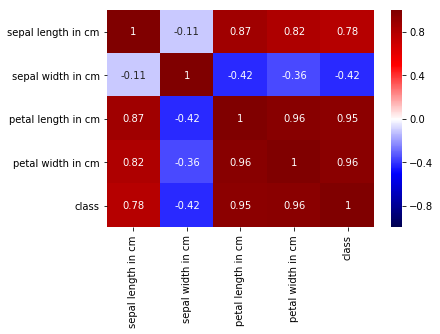

In [87]:
sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [88]:
#Petal Length and Petal Width are highly correlated with class
#Sepal Length and Sepal Width have very low correlation

### Split data in Training and test set in 80:20.

In [89]:
#Spliting the dataset into training and test sets with 80-20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train      sepal length in cm  sepal width in cm  petal length in cm  \
58                  6.6                2.9                 4.6   
97                  6.2                2.9                 4.3   
129                 7.2                3.0                 5.8   
114                 5.8                2.8                 5.1   
146                 6.3                2.5                 5.0   

     petal width in cm  
58                 1.3  
97                 1.3  
129                1.6  
114                2.4  
146                1.9  , 
 y_train      class
58       1
97       1
129      2
114      2
146      2
--------------------------------------------------------------------------------------------------
X_test      sepal length in cm  sepal width in cm  petal length in cm  \
87                  6.3                2.3                 4.4   
111                 6.4                2.7                 5.3   
10                  5.4                3.7                 1.5  

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [117]:
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
x = standardScalerX.fit_transform(X)
print(x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

### Question 14 
Train and Fit NaiveBayes Model

In [93]:
#Fit the model
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [94]:
#Predict
y_pred_nb = NB.predict(X_test)

In [95]:
#Fit the model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
#Predict
y_pred_gnb = GNB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [103]:
# show Confusion Matrix
print('Confusion Matrix for BernoulliNB:\n',metrics.confusion_matrix(y_test, y_pred_nb))
print('Confusion Matrix for GaussianNB:\n',metrics.confusion_matrix(y_test, y_pred_gnb))

Confusion Matrix for BernoulliNB:
 [[ 0  0 10]
 [ 0  0 13]
 [ 0  0  7]]
Confusion Matrix for GaussianNB:
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [106]:
# show accuracy
print ("Accuracy is ", accuracy_score(y_test,y_pred_nb)*100,"% for BernoulliNB")
print ("Accuracy is ", accuracy_score(y_test,y_pred_gnb)*100,"% for GaussianNB")

Accuracy is  23.333333333333332 % for BernoulliNB
Accuracy is  100.0 % for GaussianNB


In [114]:
#Show precision and Recall metrics for BernoulliNB
print(metrics.classification_report(y_test,y_pred_nb))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.00      0.00      0.00        13
          2       0.23      1.00      0.38         7

avg / total       0.05      0.23      0.09        30



In [113]:
#Show precision and Recall metrics for GaussianNB
print(metrics.classification_report(y_test,y_pred_gnb))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779